In [1]:
from keras.models import Sequential
from keras_preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization
from keras.layers import Convolution2D, MaxPooling2D
from keras import regularizers, optimizers
import pandas as pd
import numpy as np

Using TensorFlow backend.


In [2]:
df = pd.read_csv("D://Project//trainLabels.csv")

In [3]:
df.head()

,image,level
0,10_left,0
1,10_right,0
2,13_left,0
3,13_right,0
4,15_left,1


In [4]:
one_hot = pd.get_dummies(df['level'])

In [5]:
df = df.drop('level',axis = 1)

In [6]:
df = df.join(one_hot)

In [7]:
df.head()

,image,0,1,2,3,4
0,10_left,1,0,0,0,0
1,10_right,1,0,0,0,0
2,13_left,1,0,0,0,0
3,13_right,1,0,0,0,0
4,15_left,0,1,0,0,0


In [8]:
df['image'] = df['image'].astype(str) + ".jpeg"

In [9]:
df.head()

,image,0,1,2,3,4
0,10_left.jpeg,1,0,0,0,0
1,10_right.jpeg,1,0,0,0,0
2,13_left.jpeg,1,0,0,0,0
3,13_right.jpeg,1,0,0,0,0
4,15_left.jpeg,0,1,0,0,0


In [10]:
columns=[0,1,2,3,4]

In [11]:
data = pd.read_csv("D://Project//trainLabels.csv")

In [12]:
datagen=ImageDataGenerator(rescale=1./255.)
test_datagen=ImageDataGenerator(rescale=1./255.)

In [13]:
train_generator=datagen.flow_from_dataframe(
dataframe=df[:7000],
directory="D:\\Project\\images",
x_col="image",
y_col=columns,
batch_size=64,
seed=42,
shuffle=True,
class_mode="other",
target_size=(256,256))

Found 7000 validated image filenames.


In [14]:
valid_generator=test_datagen.flow_from_dataframe(
dataframe=df[7000:8000],
directory="D:\\Project\\images",
x_col="image",
y_col=columns,
batch_size=32,
seed=42,
shuffle=True,
class_mode="other",
target_size=(256,256))

Found 1000 validated image filenames.


In [15]:
test_generator=test_datagen.flow_from_dataframe(
dataframe=df[8000:10000],
directory="D:\\Project\\images",
x_col="image",
y_col=columns,
batch_size=64,
seed=42,
shuffle=False,
class_mode=None,
target_size=(256,256))

Found 2000 validated image filenames.


In [16]:
# initialising the CNN
classifier = Sequential()

#step 1 Convolution
classifier.add(Convolution2D(32, 3, 3, input_shape= (256, 256, 3), activation = 'relu'))

#step 2 - Pooling
classifier.add(MaxPooling2D(pool_size = (2,2)))

#2nd layer
classifier.add(Convolution2D(32, 3, 3, activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2,2)))

#step 3 - Flattening
classifier.add(Flatten())

#step-4 Full connection
classifier.add(Dense(output_dim = 128, activation = 'relu'))
classifier.add(Dense(output_dim = 5, activation = 'sigmoid'))

classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

C:\Users\MSI\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(256, 256,..., activation="relu")`
  """



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


C:\Users\MSI\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
  # This is added back by InteractiveShellApp.init_path()
C:\Users\MSI\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=128)`
C:\Users\MSI\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=5)`


In [17]:
classifier.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 254, 254, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 127, 127, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 125, 125, 32)      9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 62, 62, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 123008)            0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               15745152  
_________________________________________________________________
dense_2 (Dense)              (None, 5)                

In [18]:
history = classifier.fit_generator(generator=train_generator,
                    steps_per_epoch=train_generator.n,
                    validation_data=valid_generator,
                    validation_steps=valid_generator.n,
                    verbose=1,
                    workers=5,
                    epochs=5)


Epoch 1/5
7000/7000 [==============================] - 50216s 7s/step - loss: 0.0384 - accuracy: 0.9862 - val_loss: 3.0144 - val_accuracy: 0.8645
Epoch 2/5
7000/7000 [==============================] - 811s 116ms/step - loss: 1.1348e-06 - accuracy: 1.0000 - val_loss: 1.6262 - val_accuracy: 0.8641
Epoch 3/5
7000/7000 [==============================] - 810s 116ms/step - loss: 2.6105e-08 - accuracy: 1.0000 - val_loss: 4.5331 - val_accuracy: 0.8636
Epoch 4/5
7000/7000 [==============================] - 807s 115ms/step - loss: 1.6055e-09 - accuracy: 1.0000 - val_loss: 2.8438 - val_accuracy: 0.8640
Epoch 5/5
7000/7000 [==============================] - 807s 115ms/step - loss: 7.6701e-10 - accuracy: 1.0000 - val_loss: 2.5034 - val_accuracy: 0.8635


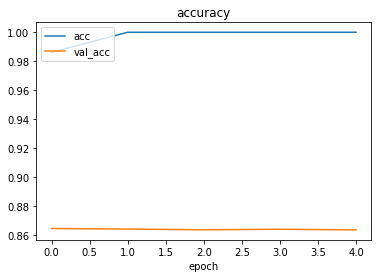

In [21]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('accuracy')
plt.xlabel('epoch')
plt.legend(['acc', 'val_acc'], loc='upper left')
plt.show()

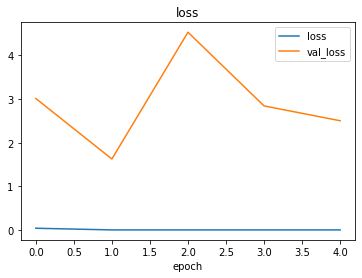

In [20]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('loss')
plt.xlabel('epoch')
plt.legend(['loss', 'val_loss'], loc='upper right')
plt.show()